In [167]:
#Sample Data Generation
import numpy as np
np.random.seed(142454543)

mean_data = np.array([0,0,0])
cov_data = np.array([[1,0,0],[0,1,0],[0,0,1]])
data = np.random.multivariate_normal(mean_data, cov_data, 20).T

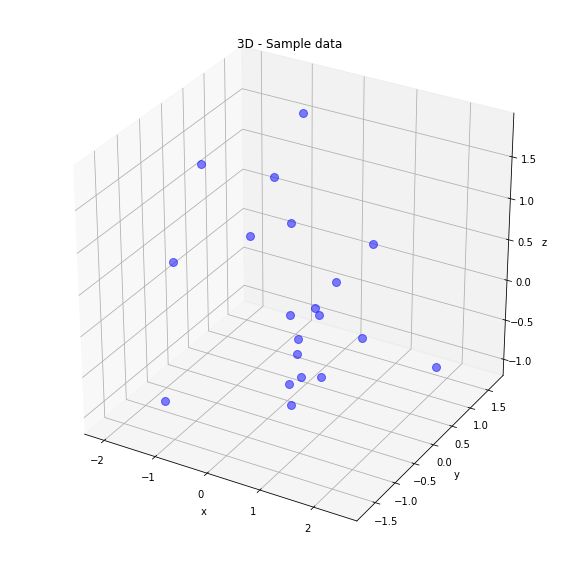

In [168]:
#Ploting the data
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(data[0,:],data[1,:],data[2,:],'o', markersize=8, color='blue', alpha=0.5)

plt.title('3D - Sample data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [169]:
#Computing the mean
m_x = np.mean(data[0,:])
m_y = np.mean(data[1,:])
m_z = np.mean(data[2,:])

mean = np.array([[m_x],[m_y],[m_z]])

In [170]:
#Computing the covariance of x,y,z
data_minus_mean = data - mean
cov_matrix = 1/(data.shape[1]-1) * data_minus_mean.dot(data_minus_mean.T)

#Computing the covariance using cov function
cov_matrix2 = np.cov([data[0,:],data[1,:],data[2,:]])

In [171]:
#Computing the eigen vectors and eigen values from the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_matrix)

print(eig_vec)

[[ 0.91794748 -0.34595944 -0.19412496]
 [-0.03993686  0.40626975 -0.91288002]
 [-0.39468656 -0.84572865 -0.35911776]]


In [172]:
#Verifying the eigen values for the data
for i in range(len(eig_val)-2):
    eig_vec0 = eig_vec[:,i].reshape(3,1)
    np.testing.assert_array_almost_equal(cov_matrix.dot(eig_vec0), eig_val[i]*eig_vec0, decimal=6)

Populating the interactive namespace from numpy and matplotlib
0.187721978839 -0.0678366356021 0.124279941303


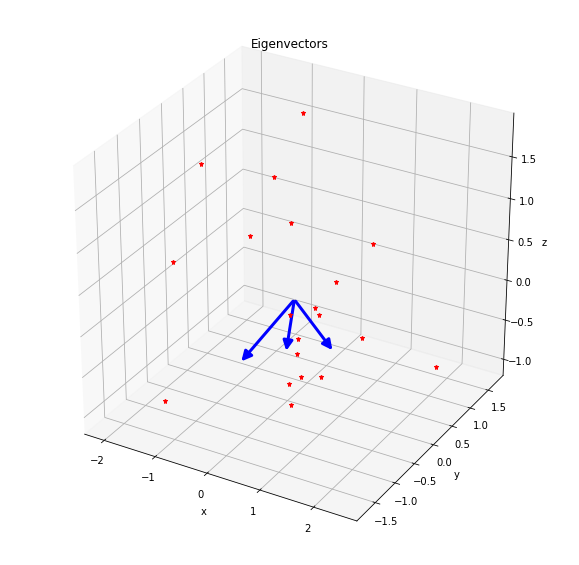

In [174]:
#Visualizing the Eigen vectors
#Triggers the import of various modules in matplotlib
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3d(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize = (10,10))
grph = fig.add_subplot(111, projection='3d')
grph.plot(data[0,:],data[1,:],data[2,:],'*', markersize=5, color='red')

print(m_x, m_y, m_z)
for vec in eig_vec.T:
    arr = Arrow3d([m_x,vec[0]],[m_y,vec[1]],[m_z,vec[2]],mutation_scale = 20, lw=3, arrowstyle="-|>",color="b")
    ax.plot([vec[0]], [vec[1]], [vec[2]], 'o', markersize=10, color='red', alpha=0.5)
    grph.add_artist(arr)

grph.set_xlabel('x')
grph.set_ylabel('y')
grph.set_zlabel('z')

plt.title('Eigenvectors')
plt.show()

In [175]:
#############)Dimensionality reduction(#############

In [176]:
#Step-1: Sort the eigen values to know the PC1, PC2 and so on
pair_eigen = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

pair_eigen.sort(key=lambda x: x[0], reverse=True)

In [177]:
#Step-2: Choose PC1 and PC2 and obtain the linear transformation matrix

LT = np.hstack((pair_eigen[0][1].reshape(3,1), pair_eigen[1][1].reshape(3,1)))

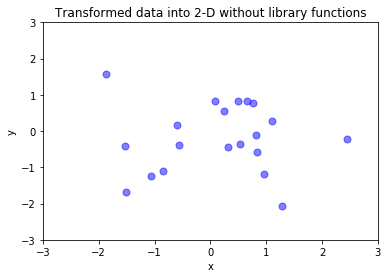

In [178]:
#Step-3: Perform linear transformation on the data
trans_data = LT.T.dot(data)

plt.plot(trans_data[0,:], trans_data[1,:], 'o', markersize=7, color='blue', alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Transformed data into 2-D without library functions')

plt.show()

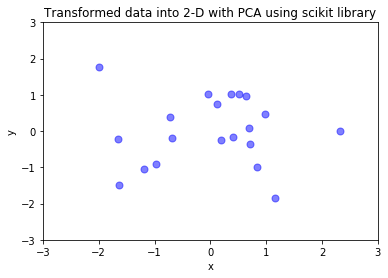

In [179]:
#Using scikit learn library to perform PCA to verify the result
from sklearn.decomposition import PCA as sklearnpca

sklearn_pca_data = sklearnpca(2)
sklearn_trans_data = sklearn_pca_data.fit_transform(data.T)
sklearn_trans_data[:,1] = sklearn_trans_data[:,1] * -1

plt.plot(sklearn_trans_data[:,0],sklearn_trans_data[:,1], 'o', markersize=7, color='blue', alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Transformed data into 2-D with PCA using scikit library')

plt.show()

In [ ]:
###Both are observed to be same. So, the implementation is correct.